In [45]:
import pandas as pd
import seaborn as sns

In [46]:
behavior = pd.read_table('/Users/gilles/git/br_anaglyph/data/behavior.tsv')

# Number of key presses per subject

In [47]:
behavior.groupby(['subject', 'session', 'run']).size()

subject  session  run
1        1        0      297
                  1      317
                  2      390
96       1        0      126
                  1      151
                  2      132
97       1        0       79
                  1       26
                  2       35
98       1        0       39
                  1       23
dtype: int64

# Remove repeated keypresses

In [48]:
behavior['previous_key'] = behavior.groupby(['subject', 'session', 'run']).key.shift(1)
print(behavior.shape)
behavior = behavior[behavior['previous_key'] != behavior['key']].reset_index()
print(behavior.shape)

(1615, 6)
(692, 7)


In [49]:
behavior.groupby(['subject', 'session', 'run']).size()

subject  session  run
1        1        0       77
                  1       72
                  2       58
96       1        0      105
                  1      112
                  2       77
97       1        0       79
                  1       26
                  2       35
98       1        0       31
                  1       20
dtype: int64

In [50]:
behavior['duration'] = behavior.groupby(['subject', 'session', 'run']).apply(lambda d: pd.Series((d['onset'] - d['onset'].shift(1).values).values)).reset_index(drop=True)

In [66]:
behavior['percept'] = behavior['previous_key'].map({'z':'full', 'x':'mixed', 'm':'full'})

In [67]:
sns.set_context('poster')

In [ ]:
fg = sns.FacetGrid(behavior, col='subject', hue='percept', col_wrap=3, sharex=False, size=5)
fg.map(sns.distplot, 'duration', bins=15).add_legend()

/Users/gilles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


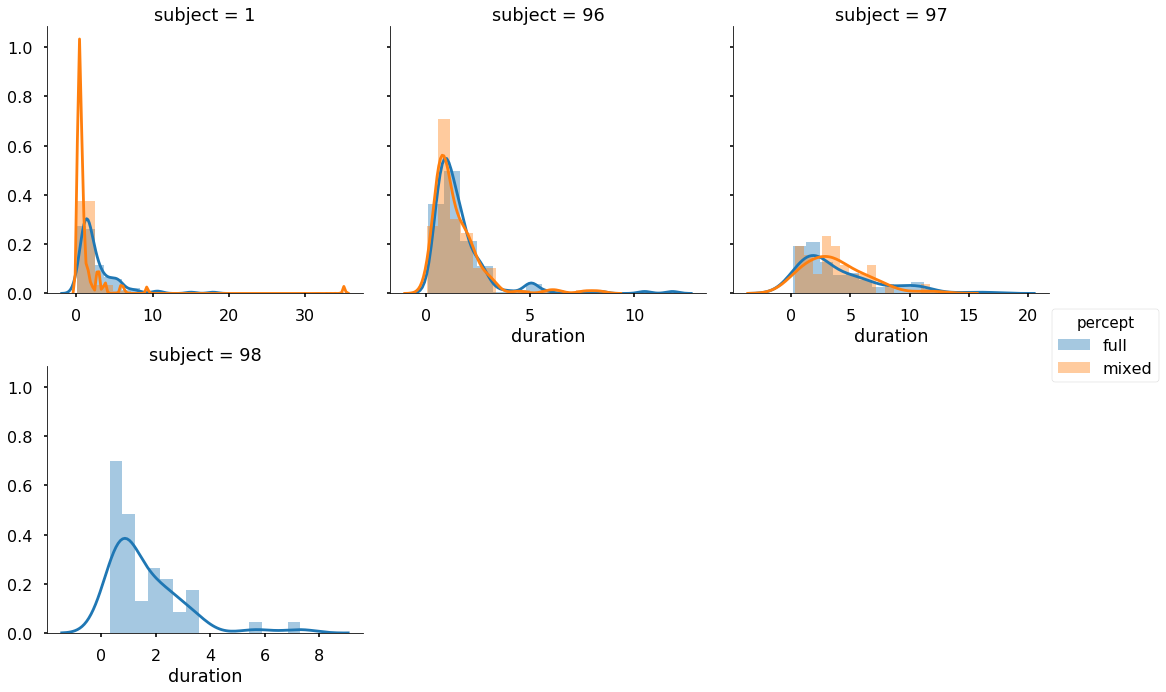

In [68]:
fg = sns.FacetGrid(behavior, col='subject', hue='percept', col_wrap=3, sharex=False, size=5)
fg.map(sns.distplot, 'duration', bins=15).add_legend()